##Assigment of Treeleaf ML internship.
Problem: Loan Defalut Prediction

###You are given a dataset of the bank loans consisting of 15 columns and a corresponding
target column. Your task is to build a machine-learning model that can accurately classify
whether the personal loan was accepted or not based on the information provided.


Dataset:
The dataset is provided in a Xlsx file with the following columns and their details:

● ID: ID of the customer

● Age: Age of the customer

● Gender: M for Male, F for Female and O for Others

● Experience: Amount of work experience in years

● Income: Amount of annual income (in thousands)

● Home Ownership: Home Owner, Rent and Home Mortgage.

● Zipcode: Postal code in which the client lives

● Family: Number of family members

● CCAvg: Average monthly spending with the credit card (in thousands

###Import necessary library

In [1]:
import pandas as pd

###Import data from local storage into Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_loan_data (3) (1).xlsx to Bank_loan_data (3) (1) (1).xlsx


###Read data using pandas

In [3]:
df = pd.read_excel("/content/data.xlsx")

In [4]:
df.head(5)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [5]:
df.tail(5)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,NaN,3,40.0,92697,1,1.9,3,0,NaN,0,0,0,1.0,0
4996,4997,30,NaN,4,15.0,92037,4,0.4,1,85,NaN,0,0,0,1.0,0
4997,4998,63,NaN,39,24.0,93023,2,0.3,3,0,NaN,0,0,0,0.0,0
4998,4999,65,NaN,40,49.0,90034,3,0.5,2,0,NaN,0,0,0,1.0,0
4999,5000,28,NaN,4,83.0,92612,3,0.8,1,0,NaN,0,0,0,1.0,1


In [6]:
df.shape
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 5000
Number of columns 16


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

Check null values in the dataset


###finding the null value from our dataset

In [8]:
df.isnull().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

###null values in percentage

In [9]:
df.isnull().sum()*100/len(df)

ID                     0.00
Age                    0.00
Gender                31.92
Experience             0.00
Income                 1.34
ZIP Code               0.00
Family                 0.00
CCAvg                  0.00
Education              0.00
Mortgage               0.00
Home Ownership        23.78
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
Online                 0.80
CreditCard             0.00
dtype: float64

In [10]:
#Handling the missing value

In [43]:
df = df.drop("ID",axis=1)
df = df.drop("ZIP Code",axis=1)

KeyError: ignored

###drop the columns whose null values are less than 5%

In [25]:


columns = ['Income','Online']
df.dropna(subset=columns,inplace=True)


In [26]:
df.isnull().sum()*100/len(df)

Age                   0.0
Gender                0.0
Experience            0.0
Income                0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Home Ownership        0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [42]:
df['Home Ownership'].mode()[0]

(3179, 14)

In [28]:
df['Home Ownership'] = df['Home Ownership'].fillna(df['Home Ownership'].mode()[0])

###Perform EDA in our data

<Axes: >

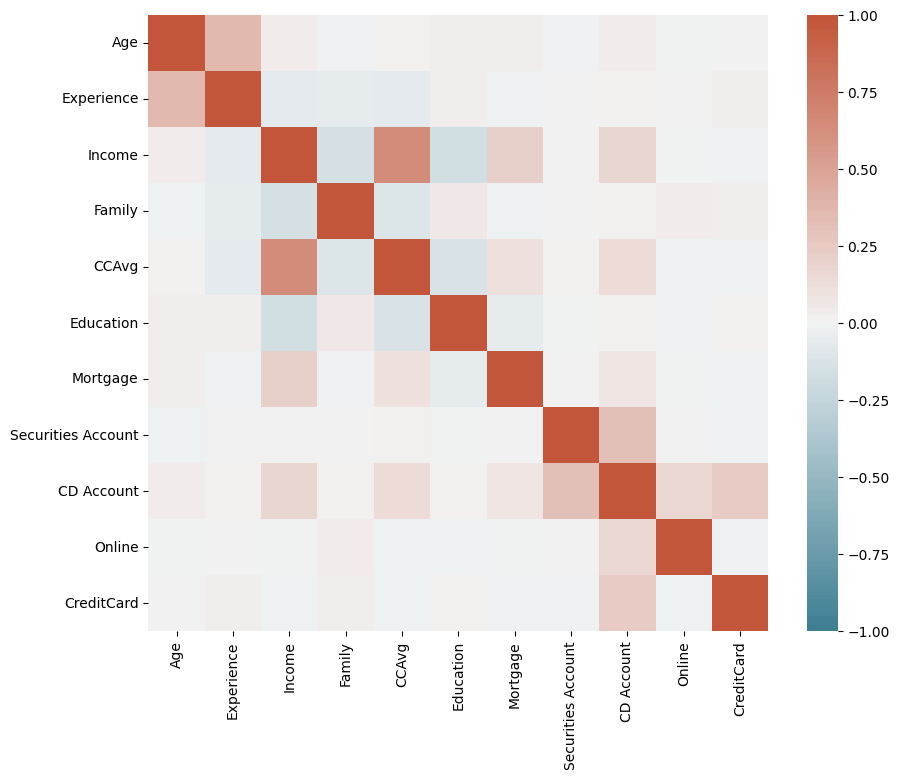

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(df.select_dtypes(include=np.number).corr(),
             vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

In [30]:
df['Gender'].value_counts()

M    1626
F    1560
Name: Gender, dtype: int64

In [32]:
filtered_df = df[df['Gender'].isin(['M', 'F'])]


df = filtered_df.drop(filtered_df[~filtered_df['Gender'].isin(['M', 'F'])].index)


gender_counts = filtered_df['Gender'].value_counts()
df

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,M,1,49.0,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,45,M,19,34.0,3,1.5,1,0,Rent,0,1,0,0.0,0
2,39,M,15,11.0,1,1.0,1,0,Rent,0,0,0,0.0,0
3,35,M,9,100.0,1,2.7,2,0,Rent,0,0,0,0.0,0
4,35,M,8,45.0,4,1.0,2,0,Rent,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,46,F,21,115.0,2,4.2,3,0,Home Owner,1,1,1,1.0,1
4846,35,F,10,135.0,3,4.8,2,0,Home Mortage,1,0,0,1.0,0
4876,44,F,19,142.0,1,1.5,3,0,Rent,1,0,0,0.0,0
4883,38,F,13,129.0,3,4.1,3,0,Rent,1,0,1,1.0,1


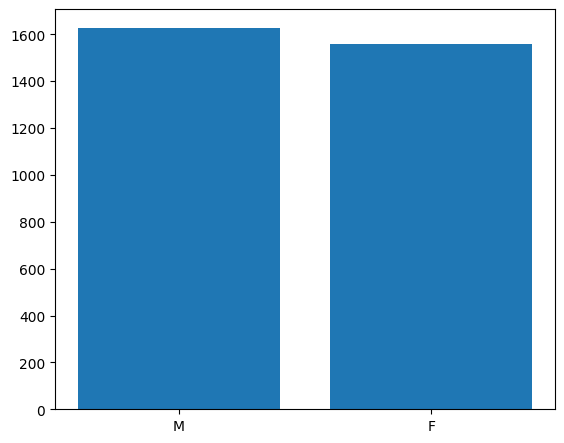

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
cat = ['M','F']
value = [df['Gender'].value_counts()[0],df['Gender'].value_counts()[1]]
ax.bar(cat,value)
plt.show()

In [34]:
df.isnull().sum()*100/len(df)

Age                   0.0
Gender                0.0
Experience            0.0
Income                0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Home Ownership        0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

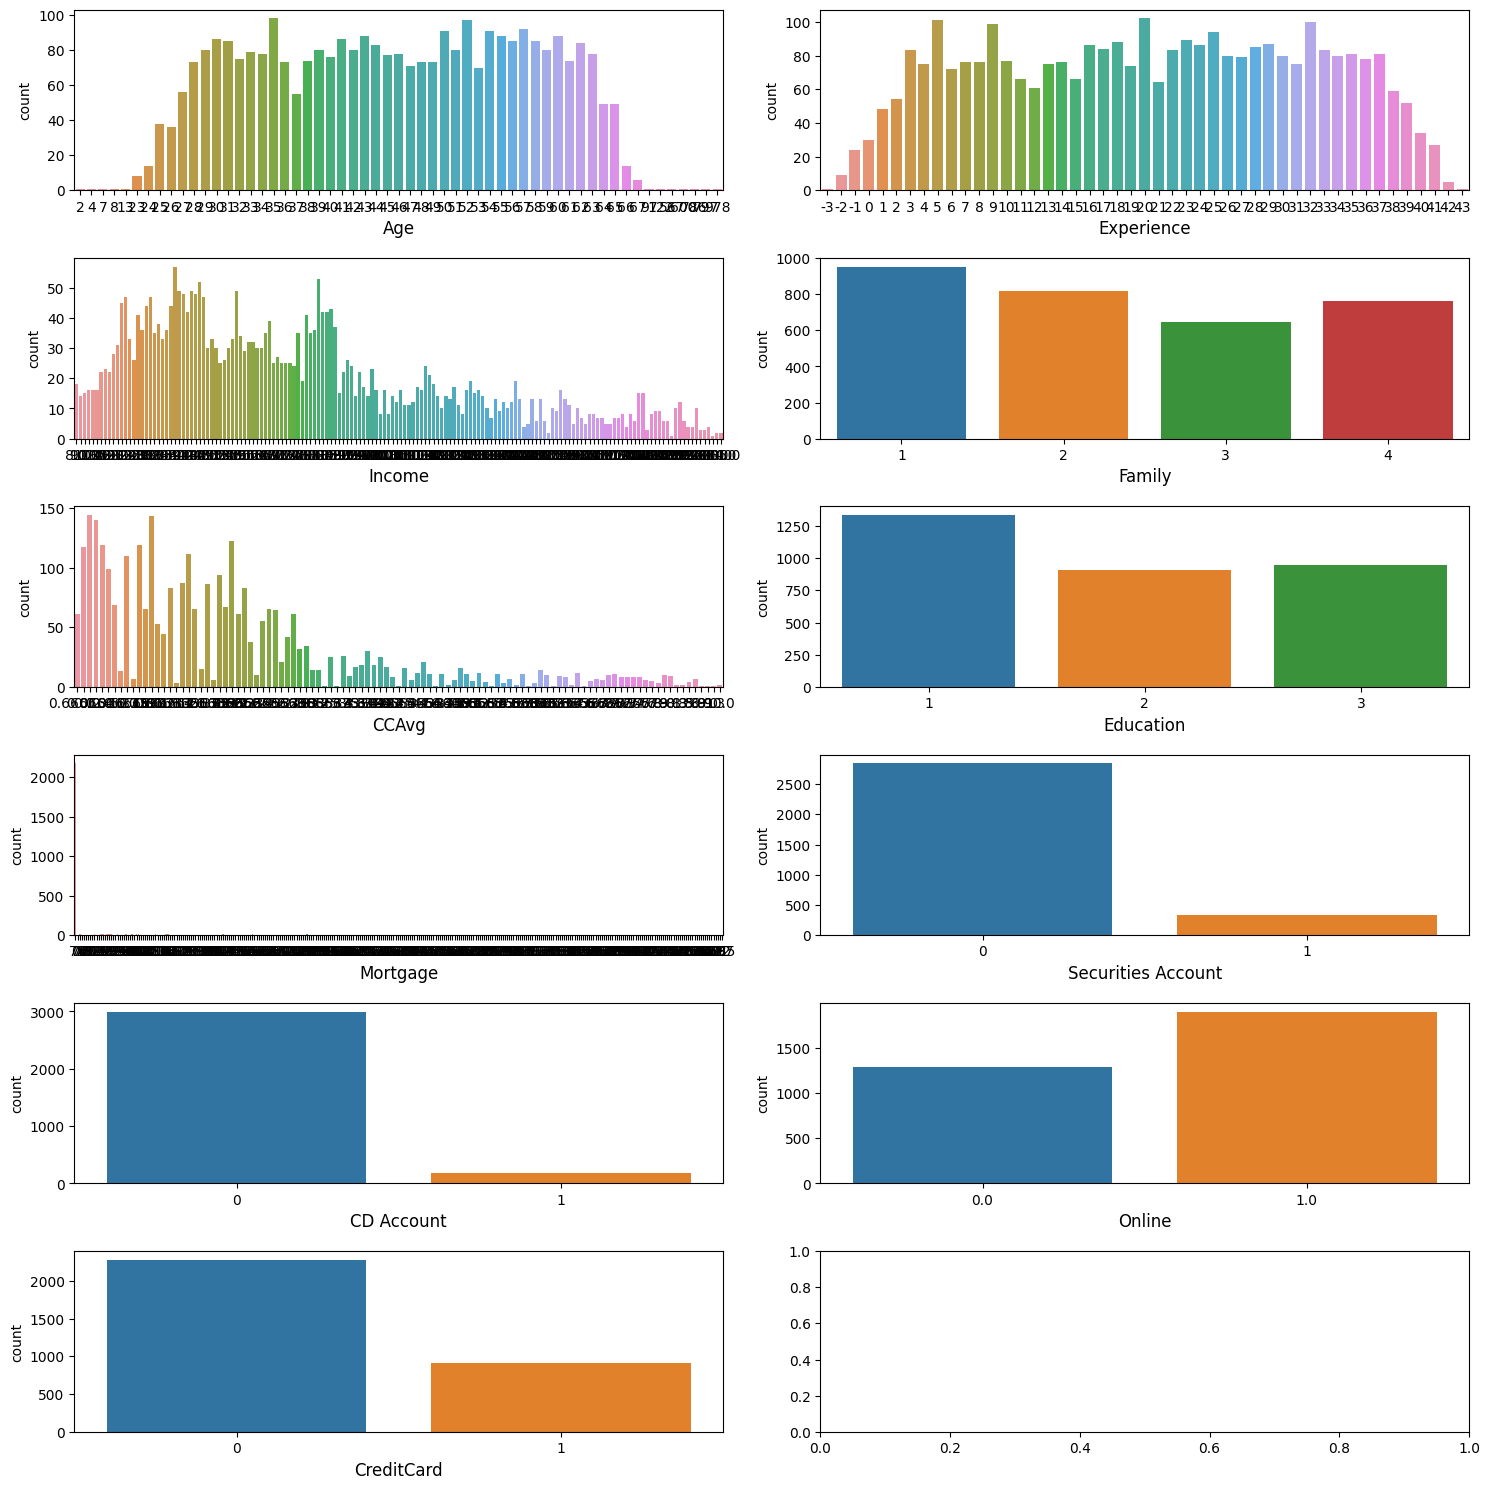

In [35]:
features = ['Age',
            'Experience',
            'Income',
            'Family',
            'CCAvg',
            'Education',
            'Mortgage',
            'Securities Account',
            'CD Account',
            'Online',
            'CreditCard']

target = 'Personal Loan'

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i in range(len(features)):
    x = i//2
    y = i%2
    sns.countplot(x=features[i] , data=df , ax=ax[x,y])
    ax[x,y].set_xlabel(features[i], size = 12)
   #

plt.tight_layout()

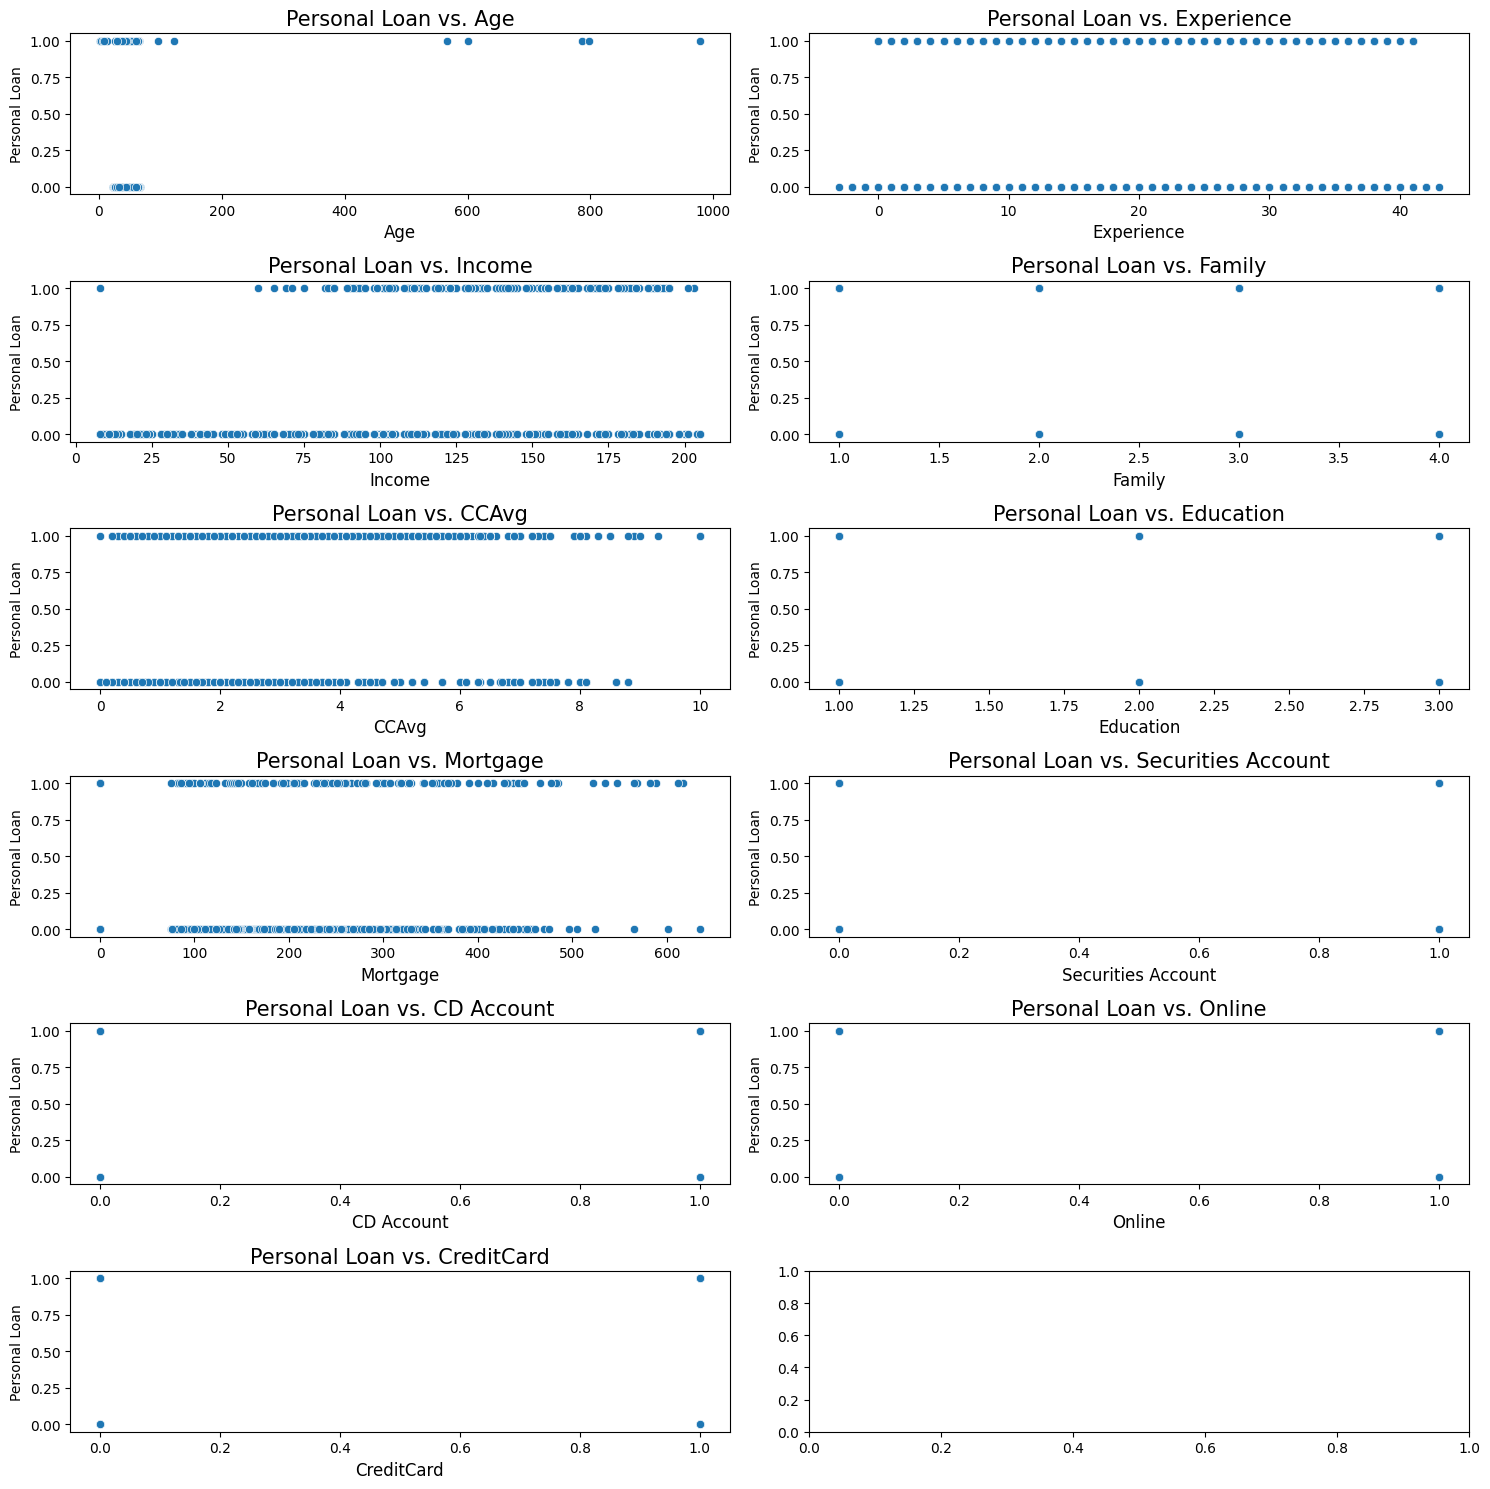

In [37]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i,var in enumerate(features):
    x = i//2
    y = i%2
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    df['Personal Loan'] = pd.to_numeric(df['Personal Loan'], errors='coerce')

    sns.scatterplot(data=df, x=var , y=df['Personal Loan'], ax=ax[x,y])
plt.tight_layout()

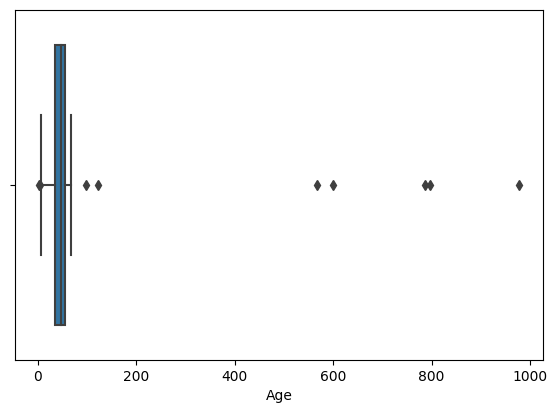

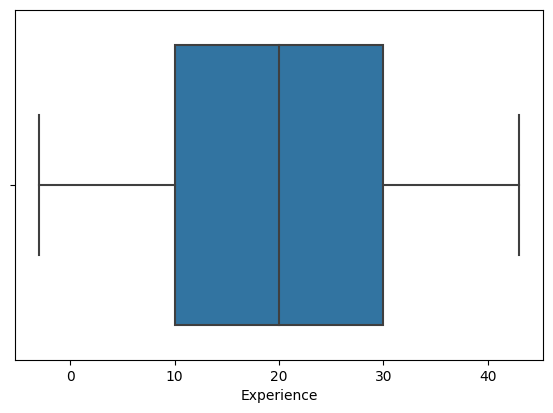

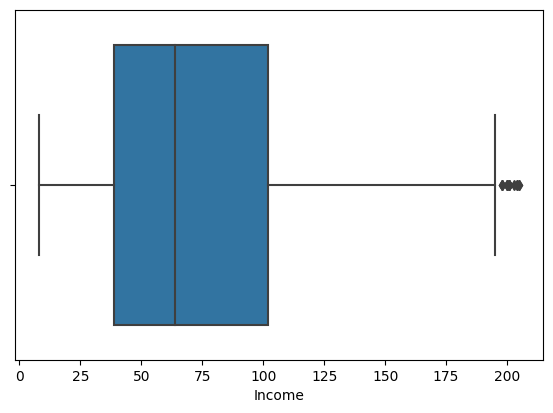

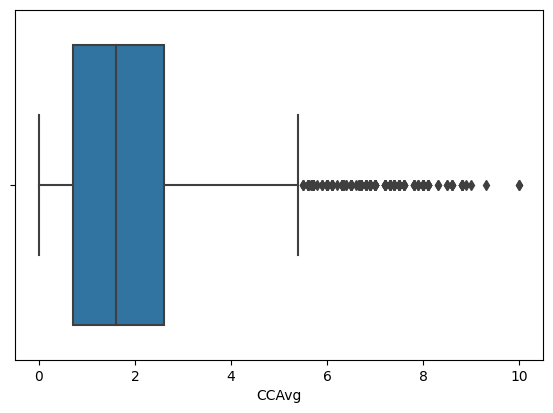

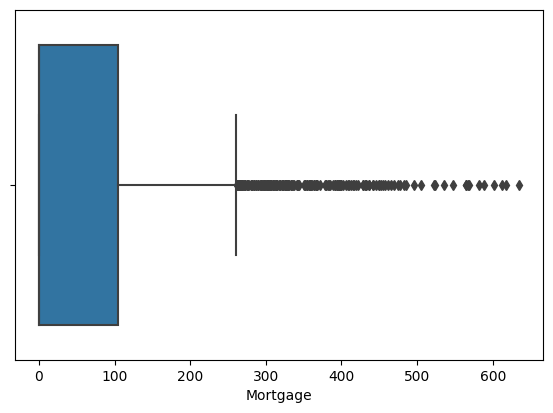

In [38]:
intended_features = ['Age','Experience','Income','CCAvg','Mortgage']


for i in intended_features:
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.boxplot(x=df[i])
    plt.show()

In [39]:
print(df["Age"].unique())

[ 25  45  39  35  37  53  50  34  65  29  48  59  67  60  38  46  55  56
  57  44  36  43  40  30  31  51  32  97  61 567  41  28  49  42  47  62
  33  27  13  54  66  24  58  52 122  26  64  63  23 978   2   4 786 600
   7   8 797]


###From the above Box Plot we can clearly see that the age features contains large numbers which can't be true because average age of healthy person is about 75 years. <br> Let consider most upper limit to 80 years.

In [40]:
df['Age'] = df['Age'].apply(lambda x: x if x <= 90 else pd.NA)
df.dropna(subset=['Age'], inplace=True)

###End of EDA and Handling Missing Value

###Now find how many categorical value for labelling categorical value

In [44]:
print(f'Categorical Features: {len([x for x in df.columns if df[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in df.columns if df[x].dtype == float or df[x].dtype == int])}')

Categorical Features: 3
Numerical Features: 11


In [45]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [46]:
df['Gender'] = df['Gender'].map({'M':1,'F':0}).astype('int')

In [47]:
df.head(5)

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,1,49.0,4,1.6,1,0,Home Owner,0.0,1,0,0.0,0
1,45,1,19,34.0,3,1.5,1,0,Rent,0.0,1,0,0.0,0
2,39,1,15,11.0,1,1.0,1,0,Rent,0.0,0,0,0.0,0
3,35,1,9,100.0,1,2.7,2,0,Rent,0.0,0,0,0.0,0
4,35,1,8,45.0,4,1.0,2,0,Rent,0.0,0,0,0.0,1


In [48]:
df['Home Ownership'].unique()

array(['Home Owner', 'Rent', 'Home Mortage'], dtype=object)

In [49]:
df['Home Ownership'] = df['Home Ownership'].map({'Home Owner':0,'Rent':1,'Home Mortage':2}).astype('int')

In [54]:
df['Age'] = df['Age'].astype(int)

###Store Feature Matrix In X And Response (Target) In Vector y

In [66]:

most_frequent_class = df['Personal Loan'].mode()[0]
df['Personal Loan'].fillna(most_frequent_class, inplace=True)
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']


###Featuring scaling

In [58]:
cols = ['Age','Income']

In [60]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols] = st.fit_transform(X[cols])

###Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

##Making the model and display confusion matrix of each Algorithm

In [83]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    print("\n\nConfusion Matrix\n")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

###Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression() accuracy is 0.9465408805031447


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression() Avg cross val score is 0.9386609221017185


Confusion Matrix

[[555   5]
 [ 29  47]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       560
         1.0       0.90      0.62      0.73        76

    accuracy                           0.95       636
   macro avg       0.93      0.80      0.85       636
weighted avg       0.94      0.95      0.94       636



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [79]:
model_df

{LogisticRegression(): 93.87}

###SVC

In [85]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.8867924528301887
SVC() Avg cross val score is 0.9005967414450552


Confusion Matrix

[[558   2]
 [ 70   6]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       560
         1.0       0.75      0.08      0.14        76

    accuracy                           0.89       636
   macro avg       0.82      0.54      0.54       636
weighted avg       0.87      0.89      0.84       636



###Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.9842767295597484
DecisionTreeClassifier() Avg cross val score is 0.9760932006140741


Confusion Matrix

[[557   3]
 [  7  69]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       560
         1.0       0.96      0.91      0.93        76

    accuracy                           0.98       636
   macro avg       0.97      0.95      0.96       636
weighted avg       0.98      0.98      0.98       636



###Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.9764150943396226
RandomForestClassifier() Avg cross val score is 0.9820710147080671


Confusion Matrix

[[560   0]
 [ 15  61]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       560
         1.0       1.00      0.80      0.89        76

    accuracy                           0.98       636
   macro avg       0.99      0.90      0.94       636
weighted avg       0.98      0.98      0.98       636



###Gradient Boosting Classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.9874213836477987
GradientBoostingClassifier() Avg cross val score is 0.9830149061555984


Confusion Matrix

[[560   0]
 [  8  68]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       560
         1.0       1.00      0.89      0.94        76

    accuracy                           0.99       636
   macro avg       0.99      0.95      0.97       636
weighted avg       0.99      0.99      0.99       636



###Save the model using pickle
Here i save model for one algorithm. we can save model of each algorithm

In [ ]:
# Save the model to a file using pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)